In [1]:
import tweepy
import json
import pickle
import os
import pandas as pd
import networkx as nx

from code import utils, pipelines
from code.graphs import PoliticalMultiGraph, PoliticalGraph
from code.representative import Representative

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('data/politicians.csv', index_col='Screen_name')
data.head()

,Name,State,Party,Twitter
Screen_name,,,,
Rep. Terri A. Sewell,Terri A. Sewell,Alabama,D,@RepTerriSewell
Rep. Tom O'Halleran,Tom O’Halleran,Arizona,D,@RepOHalleran
Rep. Ann Kirkpatrick,Ann Kirkpatrick,Arizona,D,@RepKirkpatrick
Raul M. Grijalva,Raul M. Grijalva,Arizona,D,@RepRaulGrijalva
Ruben Gallego,Ruben Gallego,Arizona,D,@RepRubenGallego


In [3]:
data_groups = data.groupby('Party')

republicans = data_groups.get_group('R')
democrats = data_groups.get_group('D')

In [4]:
republican_representatives = []

for index, row in republicans.iterrows():
    republican_representatives.append(Representative(*row))

In [5]:
with open('republican_likes.json', 'rb') as f:
    republican_likes = json.load(f)
    
len(republican_likes)

196

In [6]:
for rep in republican_representatives:
    rep.parse_user('data/republican_representatives/')
    rep.update_likes(republican_likes[rep.path_name])

In [7]:
for rep in republican_representatives:
    if not rep.is_parsed:
        print(rep.screen_name)

RepRobWoodall


In [8]:
democrat_representatives = []

for index, row in democrats.iterrows():
    democrat_representatives.append(Representative(*row))
    
with open('democrat_likes.json', 'rb') as f:
    democrat_likes = json.load(f)
    
len(democrat_likes)

227

In [9]:
for rep in democrat_representatives:
    rep.parse_user('data/democrat_representatives/')
    rep.update_likes(democrat_likes[rep.path_name])
    
for rep in democrat_representatives:
    if not rep.is_parsed:
        print(rep.screen_name)

In [13]:
all_reps = republican_representatives
all_reps.extend(democrat_representatives)

423

In [14]:
both_likes_network = PoliticalGraph(all_reps)
both_retweets_network = PoliticalGraph(all_reps)
both_mentions_network = PoliticalGraph(all_reps)

both_likes_network.add_interactions('likes', color='green')
both_retweets_network.add_interactions('retweets', color='green')
both_mentions_network.add_interactions('mentions', color='green')

In [18]:
both_likes_network.delete_isolated_nodes()
both_retweets_network.delete_isolated_nodes()
both_mentions_network.delete_isolated_nodes()

In [8]:
republicans_likes_network = PoliticalGraph(republican_representatives)
republicans_retweets_network = PoliticalGraph(republican_representatives)
republicans_mentions_network = PoliticalGraph(republican_representatives)

republicans_likes_network.add_interactions('likes', color='green')
republicans_retweets_network.add_interactions('retweets', color='red')
republicans_mentions_network.add_interactions('mentions', color='blue')

republicans_likes_network.delete_isolated_nodes()
republicans_retweets_network.delete_isolated_nodes()
republicans_mentions_network.delete_isolated_nodes()

In [7]:
democrats_likes_network = PoliticalGraph(democrat_representatives)
democrats_retweets_network = PoliticalGraph(democrat_representatives)
democrats_mentions_network = PoliticalGraph(democrat_representatives)

democrats_likes_network.add_interactions('likes', color='green')
democrats_retweets_network.add_interactions('retweets', color='red')
democrats_mentions_network.add_interactions('mentions', color='blue')

democrats_likes_network.delete_isolated_nodes()
democrats_retweets_network.delete_isolated_nodes()
democrats_mentions_network.delete_isolated_nodes()

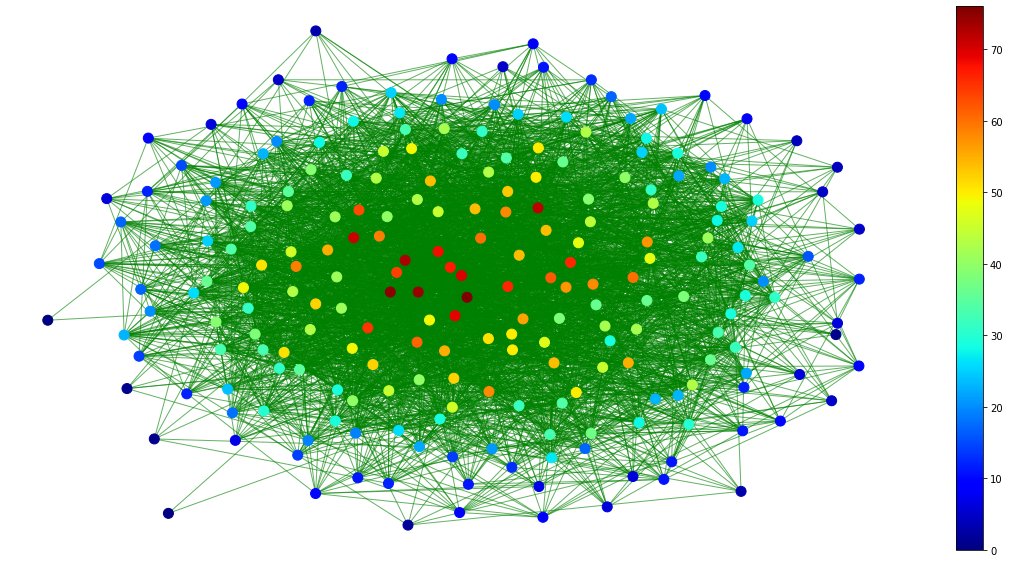

In [8]:
democrats_likes_network.draw_graph(layout=nx.kamada_kawai_layout, edge_attrs={'alpha':0.6}, node_attrs={'node_size': 100}, save_fig=True, save_fig_path='small_republican_graph.png')

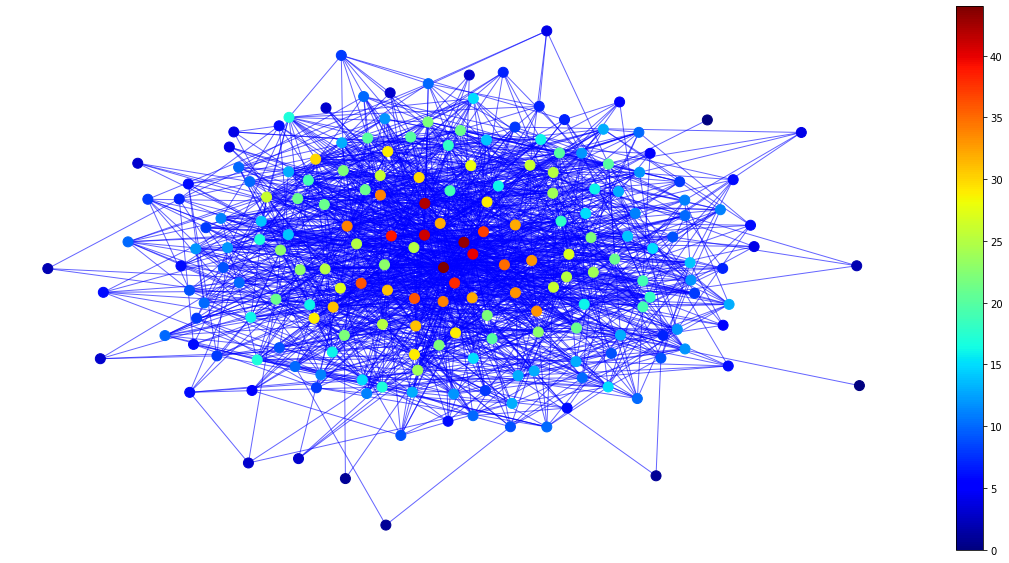

In [10]:
republicans_mentions_network.draw_graph(layout=nx.kamada_kawai_layout, edge_attrs={'alpha':0.6}, node_attrs={'node_size': 100}, save_fig=True, save_fig_path='small_republican_graph.png')

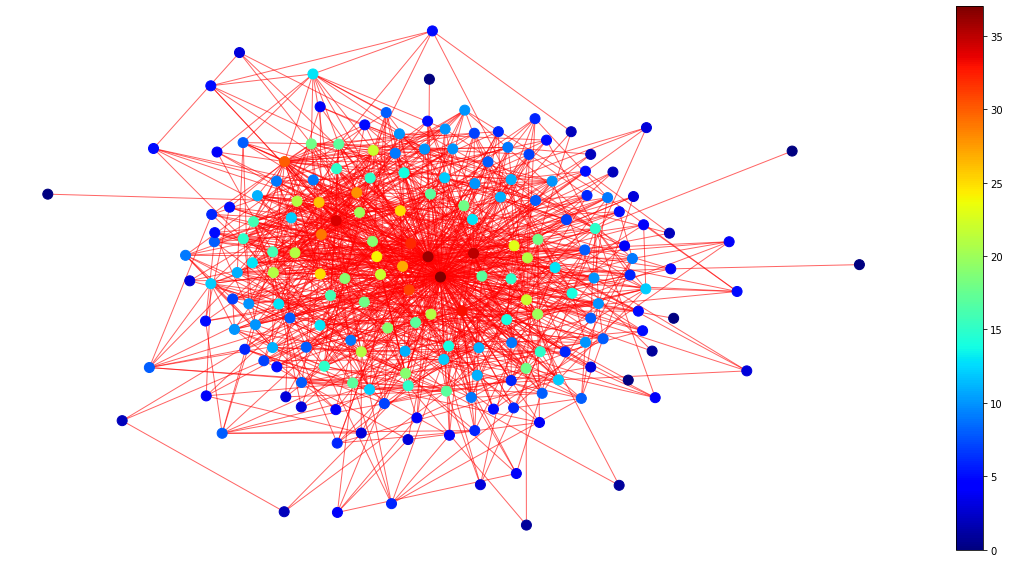

In [11]:
republicans_retweets_network.draw_graph(layout=nx.kamada_kawai_layout, edge_attrs={'alpha':0.6}, node_attrs={'node_size': 100}, save_fig=True, save_fig_path='small_republican_graph.png')

In [18]:
sorted(list(nx.betweenness_centrality(republicans_likes_network.graph).items()), key=lambda item: item[1], reverse=True)[:10]

[('SteveScalise', 0.17427306886069224),
 ('GOPLeader', 0.13079691577060243),
 ('RepBradWenstrup', 0.03446182961166803),
 ('RepDonBacon', 0.0270997171433986),
 ('RepKevinBrady', 0.025999640238494073),
 ('cathymcmorris', 0.01853432989839912),
 ('HerreraBeutler', 0.0172671336148529),
 ('RepRichHudson', 0.0171167617537721),
 ('RepLeeZeldin', 0.01627539270508758),
 ('RepAndyBiggsAZ', 0.015439490083150924)]

In [19]:
sorted(list(nx.betweenness_centrality(republicans_retweets_network.graph).items()), key=lambda item: item[1], reverse=True)[:10]

[('GOPLeader', 0.392479831423467),
 ('SteveScalise', 0.20503399239473435),
 ('RepBradWenstrup', 0.05102895385812507),
 ('Jim_Jordan', 0.020974121385902378),
 ('DesJarlaisTN04', 0.017569784523262532),
 ('RepKevinBrady', 0.016518546474034005),
 ('RepMikeJohnson', 0.014723784267919628),
 ('RepMichaelWaltz', 0.014021822580282695),
 ('RepDonBacon', 0.013641253508312613),
 ('RepMcCaul', 0.013358553324933388)]

In [20]:
sorted(list(nx.betweenness_centrality(republicans_mentions_network.graph).items()), key=lambda item: item[1], reverse=True)[:10]

[('GOPLeader', 0.1857252008104624),
 ('SteveScalise', 0.14591955242999508),
 ('RepKenBuck', 0.04404894477887037),
 ('RepTimBurchett', 0.03024370948911031),
 ('HerreraBeutler', 0.020700160151405387),
 ('TXRandy14', 0.020202717826747135),
 ('RepJackBergman', 0.020145627062186894),
 ('RepLizCheney', 0.01848783985183823),
 ('RepKevinBrady', 0.01704647908515626),
 ('RepRutherfordFL', 0.016723749787201588)]

In [23]:
def to_gephi(graph, path):
    os.mkdir(path)
    edges = list(graph.edges(data=True))
    nodes = list(graph.nodes(data=True))
    
    formated_edges = [{'Source': edge[0], 'Target': edge[1], 'Weight': sum([edge[2]['likes'], edge[2]['retweets'], edge[2]['mentions']])} for edge in edges]
    formated_nodes = [{'Id': rep[0], 'State': rep[1]['state'], 'Name':rep[1]['name'], 'Party':rep[1]['party']} for rep in nodes]
    
    df_edges = pd.DataFrame(formated_edges)
    df_nodes = pd.DataFrame(formated_nodes)
    
    df_edges.to_csv(path+'edges.csv', index=False)
    df_nodes.to_csv(path+'nodes.csv', index=False)

In [49]:
to_gephi(republicans_likes_network.graph, 'data/interactions/republican_likes/')

In [50]:
to_gephi(republicans_mentions_network.graph, 'data/interactions/republican_mentions/')

In [51]:
to_gephi(republicans_retweets_network.graph, 'data/interactions/republican_retweets/')

In [11]:
to_gephi(democrats_mentions_network.graph, 'data/interactions/democrat_mentions/')

In [12]:
to_gephi(democrats_retweets_network.graph, 'data/interactions/democrat_retweets/')

In [13]:
to_gephi(democrats_likes_network.graph, 'data/interactions/democrat_likes/')

In [24]:
to_gephi(both_likes_network.graph, 'data/interactions/both_likes/')

In [25]:
to_gephi(both_retweets_network.graph, 'data/interactions/both_retweets/')

In [26]:
to_gephi(both_mentions_network.graph, 'data/interactions/both_mentions/')

## Hashtag graphs

In [47]:
dem_hashtags = pd.read_csv('data/dem_hashtags.csv', index_col='Politician')
dem_hashtags['Hashtags'] = dem_hashtags['Hashtags'].apply(eval)
dem_hashtags.head()

,Hashtags
Politician,
BennieGThompson,"[2020Census, Action, AhmaudArbery, BLM, Better..."
BettyMcCollum04,"[19thAmendment, 2020Census, ANWR, ActOnClimate..."
BillPascrell,"[COVID19, DCstatehood, DeadbeatDon, DisbarBarr..."
BlumenauerMedia,"[2010Census, 2012EnviroScorecard, ACA, ActOnCl..."
BobbyScott,"[2020Census, 2020census, 4thofJuly, AAPI, ADA3..."


In [70]:
set(dem_hashtags.loc['BennieGThompson']['Hashtags']).intersection(dem_hashtags.loc['BettyMcCollum04']['Hashtags'])

{'2020Census',
 'BLM',
 'COVID19',
 'DontMessWithUSPS',
 'FamiliesFirst',
 'ForThePeople',
 'HeroesAct',
 'JusticeInPolicing',
 'LaborDay',
 'NationalVoterRegistrationDay',
 'SaveTheACA',
 'TrumpKnew',
 'Vote'}

In [48]:
len(dem_hashtags.index.values)

227

In [53]:
all_unique_hashtags = [v[0] for v in dem_hashtags.values]

In [60]:
from collections import defaultdict

hashtag_counts = defaultdict(int)

for user_hashtags in all_unique_hashtags:
    for hashtag in user_hashtags:
        hashtag_counts[hashtag] += 1
        
len(hashtag_counts)

8719

In [64]:
hashtag_counts['2020census']

52

In [66]:
hashtag_weights = {item[0]: 1-(item[1]/227) for item in hashtag_counts.items()}
print([(item[0], item[1]) for item in hashtag_weights.items()][:5])

[('2020Census', 0.1541850220264317), ('Action', 0.9955947136563876), ('AhmaudArbery', 0.960352422907489), ('BLM', 0.947136563876652), ('BetterTogether', 0.9911894273127754)]


In [85]:
def build_hashtag_network(df, hashtag_weights):
    politicians = df.index.values
    
    net = nx.Graph()
    net.add_nodes_from(politicians)
    
    # Iterate over each pair and sum weights of common hashtags to use as edge weight
    for i in range(len(politicians)):
        for j in range(i+1, len(politicians)):
            common_hashtags = set(df.loc[politicians[i]]['Hashtags']).intersection(df.loc[politicians[j]]['Hashtags'])
            
            edge_weight = sum([hashtag_weights[hashtag] for hashtag in common_hashtags])
            net.add_edge(politicians[i], politicians[j], weight=edge_weight)
    
    return net

In [86]:
net = build_hashtag_network(dem_hashtags, hashtag_weights)

In [92]:
list(net.edges(data=True))[:3]

[('BennieGThompson', 'BettyMcCollum04', {'weight': 6.1233480176211454}),
 ('BennieGThompson', 'BillPascrell', {'weight': 0.048458149779735726}),
 ('BennieGThompson', 'BlumenauerMedia', {'weight': 0})]

In [98]:
def hashtag_graph_to_gephi(graph, file_name='rename'):
    edges = list(graph.edges(data=True))
    nodes = list(graph.nodes(data=True))
    
    formated_edges = [{'Source': edge[0], 'Target': edge[1], 'Weight': edge[2]['weight']} for edge in edges]
    formated_nodes = [{'Id': rep[0]} for rep in nodes]
    
    df_edges = pd.DataFrame(formated_edges)
    df_nodes = pd.DataFrame(formated_nodes)
    
    df_edges.to_csv(file_name+'_edges.csv', index=False)
    df_nodes.to_csv(file_name+'_nodes.csv', index=False)

In [99]:
hashtag_graph_to_gephi(net, 'dem_hashtags')